In [2]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
mult_qa = getDF('../../data/QA_Electronics_multiple.json.gz')

In [4]:
mult_qa.head()

,asin,questions
0,1400599997,"[{'questionType': 'yes/no', 'askerID': 'A1KP1T..."
1,9625993428,"[{'questionType': 'yes/no', 'askerID': 'A2L703..."
2,9966541551,"[{'questionType': 'open-ended', 'askerID': 'A3..."
3,9983891212,"[{'questionType': 'yes/no', 'askerID': 'AP33MX..."
4,B00000J08Q,"[{'questionType': 'yes/no', 'askerID': 'A3159B..."


In [10]:
pd.DataFrame(mult_qa['questions'][0][0])

,answers,askerID,questionText,questionTime,questionType
0,{'answerText': 'Very much. Both my 9&4yr old c...,A1KP1TT2M38V8P,is it user friendly,"June 27, 2013",yes/no
1,{'answerText': 'I have the nook 1st edition an...,A1KP1TT2M38V8P,is it user friendly,"June 27, 2013",yes/no
2,{'answerText': 'It is pretty user friendly/ se...,A1KP1TT2M38V8P,is it user friendly,"June 27, 2013",yes/no
3,"{'answerText': 'Yes, it's pretty simply and st...",A1KP1TT2M38V8P,is it user friendly,"June 27, 2013",yes/no
4,{'answerText': 'I like the nook. I'm a reading...,A1KP1TT2M38V8P,is it user friendly,"June 27, 2013",yes/no
5,{'answerText': 'I bought it as a gift so I don...,A1KP1TT2M38V8P,is it user friendly,"June 27, 2013",yes/no


In [15]:
reviews = getDF('../../data/review_electronics.json.gz')

In [17]:
reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5.0,This works great but read the details...,1390176000,"01 20, 2014"


In [144]:
reviews_byname = reviews.sort_values(by = ['reviewerName'])

In [150]:
reviews_byname_grouped = reviews_byname.groupby(reviews_byname['reviewerName']).count().sort_values(by=['asin'], ascending=False)

In [151]:
from matplotlib import pyplot as plt

In [152]:
reviews_byname_grouped = reviews_byname_grouped.drop(['helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'], axis=1)

In [157]:
s = (reviews_byname_grouped['asin'] <= 500)

In [158]:
reviews_byname_grouped_filtered = reviews_byname_grouped.loc[s]

In [167]:
reviews_byname_grouped_filtered

,asin
reviewerName,
Anonymous,497
Peter,487
JB,480
Jonathan,479
George,460
Sean,449
Frank,434
"A. Dent ""Aragorn""",427
Jeremy,424


In [183]:
reviews_byname_grouped_filtered = reviews_byname_grouped_filtered.drop(['reviewerID'], axis=1)

ValueError: labels ['reviewerID'] not contained in axis

In [184]:
ax = reviews_byname_grouped_filtered.plot.hist(bins = 500, logx=True)

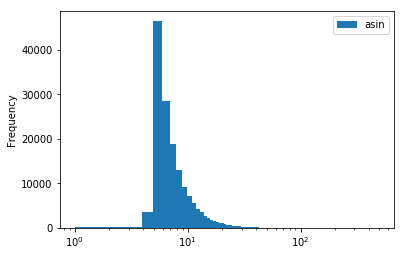

In [185]:
plt.show()

In [186]:
len(reviews_byname_grouped_filtered) / len(reviews_byname_grouped)

0.9996929859571777

In [193]:
reviews_byname_grouped_filtered_100 = reviews_byname_grouped_filtered.loc[(reviews_byname_grouped['asin'] <= 100)]

In [194]:
len(reviews_byname_grouped_filtered_100) / len(reviews_byname_grouped)

0.9966903886183754

In [195]:
ax = reviews_byname_grouped_filtered_100.plot.hist(bins = 100, logx=True)
ax = reviews_byname_grouped_filtered_100.plot.hist(bins = 100)

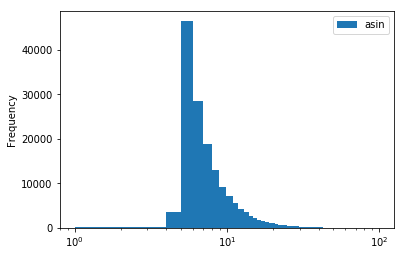

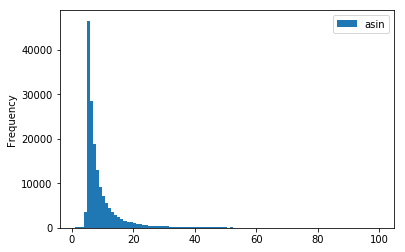

In [196]:
plt.show()

In [197]:
reviews_byname_grouped_filtered_100.columns.values

array(['asin'], dtype=object)

In [199]:
reviews_byname_grouped_filtered_100.head()

,asin
reviewerName,
tom,100
D. Johnson,100
ElmoTheCat,100
Schwartz,100
Rl Shuey,100


In [200]:
mult_qa.head()

,asin,questions
0,1400599997,"[{'questionType': 'yes/no', 'askerID': 'A1KP1T..."
1,9625993428,"[{'questionType': 'yes/no', 'askerID': 'A2L703..."
2,9966541551,"[{'questionType': 'open-ended', 'askerID': 'A3..."
3,9983891212,"[{'questionType': 'yes/no', 'askerID': 'AP33MX..."
4,B00000J08Q,"[{'questionType': 'yes/no', 'askerID': 'A3159B..."


In [201]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [212]:
merged = pd.merge(reviews, mult_qa, on=['asin', 'asin'])

In [204]:
merged

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,questions
0,A20XXTXWF2TCPY,0972683275,NaN,"[0, 0]","This is a great buy, compared to a $60 or more...",5.0,Excelant mount for Tv. Would buy more if I nee...,1405123200,"07 12, 2014","[{'questionType': 'open-ended', 'askerID': 'AD..."
1,A2IDCSC6NVONIZ,0972683275,2Cents!,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,1367280000,"04 30, 2013","[{'questionType': 'open-ended', 'askerID': 'AD..."
2,A1EDI0X3GI1SK7,0972683275,AGW,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,1323993600,"12 16, 2011","[{'questionType': 'open-ended', 'askerID': 'AD..."
3,A3BMUBUC1N77U8,0972683275,ahoffoss,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",1385164800,"11 23, 2013","[{'questionType': 'open-ended', 'askerID': 'AD..."
4,AVRFGGCCCR6QU,0972683275,"Alberto Dieguez ""premiere purchaser of random...","[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,1283126400,"08 30, 2010","[{'questionType': 'open-ended', 'askerID': 'AD..."
5,A3UOSOCRKS3WIH,0972683275,Allen Coberly,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,1368316800,"05 12, 2013","[{'questionType': 'open-ended', 'askerID': 'AD..."
6,A371ZZ95ZQEIZV,0972683275,Amazon Customer,"[0, 0]","I received the mount, which was well packaged ...",4.0,"Sturdy Mount, good customer service",1389052800,"01 7, 2014","[{'questionType': 'open-ended', 'askerID': 'AD..."
7,A7060R14RJF3I,0972683275,Amazon Customer,"[0, 0]","Took a bit of work, but used this to fit an ol...",4.0,Works,1368835200,"05 18, 2013","[{'questionType': 'open-ended', 'askerID': 'AD..."
8,A26QCCO0101CO1,0972683275,"Amazon Customer ""jkhinch""","[7, 9]",I used this for my 47&#34; Samsung. Its fit/fe...,5.0,Just what I'd hoped,1361404800,"02 21, 2013","[{'questionType': 'open-ended', 'askerID': 'AD..."
9,APBF796U7GUTV,0972683275,"Amazon Customer ""steve-mc2""","[1, 1]",This item serves its purpose as well as any ot...,5.0,Nice Mount,1331942400,"03 17, 2012","[{'questionType': 'open-ended', 'askerID': 'AD..."


In [209]:
len(reviews['asin'].unique())

63001

In [206]:
len(mult_qa)

38959

In [207]:
len(merged)

1052733

In [208]:
1689188 - 38959

1650229

In [214]:
len(merged['asin'].unique())

22960

In [229]:
reviews_grouped_by_asin = reviews.groupby(reviews['asin']).size().reset_index()

In [230]:
reviews_grouped_by_asin.columns = ['asin', 'num_reviews']

In [232]:
reviews_grouped_by_asin = reviews_grouped_by_asin.sort_values(by=['num_reviews'], ascending=False)

In [234]:
reviews_grouped_by_asin.describe()

,num_reviews
count,63001.000000
mean,26.812082
std,75.821107
min,5.000000
25%,7.000000
50%,11.000000
75%,22.000000
max,4915.000000


In [237]:
len(reviews)

1689188

In [238]:
1689188 / 63001

26.81208234789924

In [239]:
merged_product_ids = pd.merge(reviews_grouped_by_asin, mult_qa, on=['asin', 'asin'])

In [240]:
merged_product_ids.describe()

,asin,num_reviews,questions
0,B003ES5ZUU,4143,"[{'questionType': 'open-ended', 'askerID': 'A3..."
1,B0019EHU8G,3435,"[{'questionType': 'open-ended', 'askerID': 'A2..."
2,B002WE6D44,2813,"[{'questionType': 'open-ended', 'askerID': 'A8..."
3,B003ELYQGG,2652,"[{'questionType': 'open-ended', 'askerID': 'A2..."
4,B0002L5R78,2599,"[{'questionType': 'open-ended', 'askerID': 'A1..."
5,B009SYZ8OC,2542,"[{'questionType': 'open-ended', 'askerID': 'A1..."
6,B002V88HFE,2082,"[{'questionType': 'open-ended', 'askerID': 'AA..."
7,B0074BW614,2069,"[{'questionType': 'open-ended', 'askerID': 'A3..."
8,B000LRMS66,1960,"[{'questionType': 'open-ended', 'askerID': 'A1..."
9,B005FYNSPK,1884,"[{'questionType': 'open-ended', 'askerID': 'AN..."


In [254]:
def pid_question_answers(row):
    questions = row['questions']
    total_questions = len(questions)
    num_answers_list = [len(question['answers']) for question in questions]
    total_answers = sum(num_answers_list)
    return (row['asin'], total_questions, total_answers)

mult_qa_stats = mult_qa[['questions', 'asin']].apply(pid_question_answers, axis=1)
mult_qa_stats = mult_qa_stats.apply(pd.Series)
mult_qa_stats.columns=['asin', 'num_questions','num_answers']

In [255]:
mult_qa_stats.describe()

,num_questions,num_answers
count,38959.000000,38959.000000
mean,5.940835,22.277805
std,2.494136,11.786033
min,1.000000,1.000000
25%,4.000000,13.000000
50%,6.000000,21.000000
75%,8.000000,30.000000
max,10.000000,88.000000


In [256]:
mult_qa_stats.head()

,asin,num_questions,num_answers
0,1400599997,7,26
1,9625993428,3,13
2,9966541551,7,21
3,9983891212,6,19
4,B00000J08Q,5,14


In [257]:
reviews_qa_stats = pd.merge(reviews_grouped_by_asin, mult_qa_stats, on=['asin', 'asin'])

In [258]:
reviews_qa_stats.describe()

,num_reviews,num_questions,num_answers
count,22960.000000,22960.000000,22960.000000
mean,45.850740,6.439286,24.583319
std,105.185446,2.386930,11.749773
min,5.000000,1.000000,1.000000
25%,9.000000,5.000000,16.000000
50%,19.000000,7.000000,24.000000
75%,43.000000,8.000000,32.000000
max,4143.000000,10.000000,88.000000


In [259]:
reviews_qa_stats.head()

,asin,num_reviews,num_questions,num_answers
0,B003ES5ZUU,4143,8,28
1,B0019EHU8G,3435,9,37
2,B002WE6D44,2813,5,16
3,B003ELYQGG,2652,10,51
4,B0002L5R78,2599,8,31


In [262]:
num_qa = 24.583319 * 22960.000000
num_qa

564433.00424

In [263]:
sum(reviews_qa_stats['num_answers'])

564433

In [267]:
24.5 / 6.4

3.828125